## Problem 1.7



## (a)
$\triangledown \mathrm{f_{1}}(x) = \begin{bmatrix}
2\\ 
3
\end{bmatrix}$

$\triangledown \mathrm{f_{2}}(x) = \begin{bmatrix}
2x-y\\ 
2y-x
\end{bmatrix}$

$\triangledown \mathrm{f_{3}}(x) = \begin{bmatrix}
\mathrm{cos}(y-5)\\ 
-\mathrm{sin}(x-5)
\end{bmatrix}$

## (b)

First, import requisite packages

In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

Create $x, y$ and $\mathrm{f_{1}}(x, y)$, $\mathrm{f_{2}}(x, y)$, $\mathrm{f_{3}}(x, y)$.

In [2]:
# Create symbol function for fn
x_s, y_s = sp.symbols('x_s, y_s')
f1_s = (2 * x_s) + (3 * y_s) + 1
f2_s = sp.power.Pow(x_s, 2) + sp.power.Pow(y_s, 2) - x_s * y_s + 5
f3_s = (x_s - 5) * sp.cos(y_s - 5) - (y_s - 5) * sp.sin(x_s - 5)

x = np.linspace(-2, 3.5, 144)
y = np.linspace(-2, 3.5, 144)

Draw The Contour as follow.

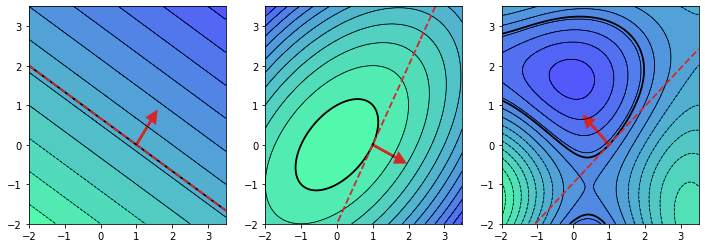

In [3]:
X, Y = np.meshgrid(x, y)

# ===========================================================
# Function to plot f's contour
# ===========================================================
def plot_contour(X, Y, f_s, density=12):
    
    # convert symbol to numeric
    f = sp.lambdify((x_s, y_s), f_s, 'numpy')
    
    Cf = plt.contourf(X, Y, f(X, Y), levels=density, alpha=.68, cmap=plt.cm.winter_r)
    C = plt.contour(X, Y, f(X, Y), levels=density, linewidths=.8, colors='black')
    return


# ===========================================================
# Function to plot the specific level set of cordinate (x, y)
# and it's tangent plane and gradients
# ===========================================================
def plot_level_gradient(X, Y, f_s, cord=(1, 0)):
    
    # convert symbol to numeric
    f = sp.lambdify((x_s, y_s), f_s, 'numpy')
    
    # Compute the gradient with respect of x, y    
    dfdx_s = sp.diff(f_s, x_s)
    dfdy_s = sp.diff(f_s, y_s)
    
    dfdx = float(dfdx_s.evalf(subs={x_s:cord[0], y_s:cord[1]}))
    dfdy = float(dfdy_s.evalf(subs={x_s:cord[0], y_s:cord[1]}))
    mean = np.sqrt(dfdx ** 2 + dfdy ** 2)
    
    # Coumpute tangent plane
    f_tan = dfdx * (X - cord[0]) + dfdy * (Y - cord[1]) + f(cord[0], cord[1])
    
    # Plot
    Cl = plt.contour(X, Y, f(X, Y), levels=[f(cord[0], cord[1])], linewidths=1.8, colors='black')
    tgp = plt.contour(X, Y, f_tan, levels=[f(cord[0], cord[1])], linewidths=1.8, colors='C3', 
                     linestyles='dashed')
    ar = plt.arrow(x=cord[0], y=cord[1], dx=dfdx / mean, dy=dfdy / mean, lw=2.4,
                   length_includes_head=True, shape='full', head_width=0.25, head_length=0.25, color='C3')
    return

# Plot three functions
plt.figure(figsize=(12, 4))

plt.subplot(131)
plot_contour(X, Y, f1_s)
plot_level_gradient(X, Y, f1_s, cord=(1, 0))

plt.subplot(132)
plot_contour(X, Y, f2_s)
plot_level_gradient(X, Y, f2_s, cord=(1, 0))

plt.subplot(133)
plot_contour(X, Y, f3_s)
plot_level_gradient(X, Y, f3_s, cord=(1, 0))


The above is 2-D contour plots with tangent line (dashed red line) and gradient(red arrow) of $\mathrm{f_{1}}(x, y)$, $\mathrm{f_{2}}(x, y)$, $\mathrm{f_{3}}(x, y)$ from left to right.

## (c)

Plot 3-dimensional linear approximation of the function.

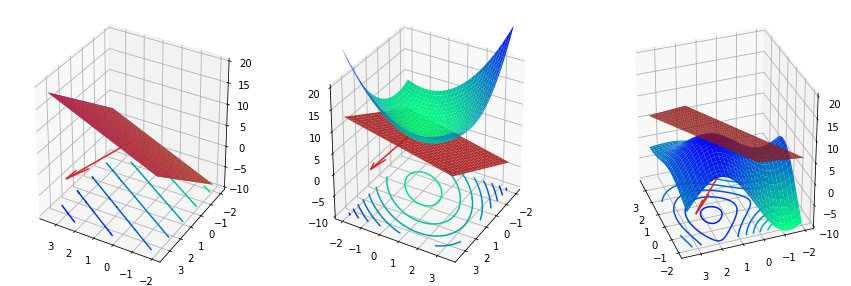

In [4]:
# ===========================================================
# Function to plot f's 3-D manifestation
# ===========================================================
def plot_3d(X, Y, f_s, ax):
    
    # convert symbol to numeric
    f = sp.lambdify((x_s, y_s), f_s, 'numpy')
    
    ax.plot_surface(X, Y, f(X, Y), rstride=5, cstride=5, cmap=plt.cm.winter_r)
    ax.contour(X, Y, f(X, Y), zdir='z', offset=-10, cmap=plt.cm.winter_r)
    ax.set_zlim(-10, 20)
    return


# ===========================================================
# Function to plot the specific level set of cordinate (x, y)
# and it's tangent plane and gradients IN 3-D.
# ===========================================================
def plot_level_3d(X, Y, f_s, ax, cord=(1, 0)):
    
    # convert symbol to numeric
    f = sp.lambdify((x_s, y_s), f_s, 'numpy')
    
    # Compute the gradient with respect of x, y    
    dfdx_s = sp.diff(f_s, x_s)
    dfdy_s = sp.diff(f_s, y_s)
    
    dfdx = float(dfdx_s.evalf(subs={x_s:cord[0], y_s:cord[1]}))
    dfdy = float(dfdy_s.evalf(subs={x_s:cord[0], y_s:cord[1]}))
    mean = np.sqrt(dfdx ** 2 + dfdy ** 2)
    
    # Coumpute tangent plane
    f_tan = dfdx * (X - cord[0]) + dfdy * (Y - cord[1]) + f(cord[0], cord[1])
    
    # Plot
    ax.plot_surface(X, Y, f_tan, rstride=5, cstride=5, color='C3')
    ax.quiver(cord[0], cord[1], f(cord[0], cord[1]), dfdx, dfdy, -5, color='C3',
              arrow_length_ratio=0.24)
    

# Plot
fig = plt.figure(figsize=(15, 5))

ax = fig.add_subplot(1, 3, 1, projection='3d')
plot_3d(X, Y, f1_s, ax)
plot_level_3d(X, Y, f1_s, ax, cord=(1, 0))
ax.view_init(30, 120)

ax = fig.add_subplot(1, 3, 2, projection='3d')
plot_3d(X, Y, f2_s, ax)
plot_level_3d(X, Y, f2_s, ax, cord=(1, 0))
ax.view_init(30, 30)

ax = fig.add_subplot(1, 3, 3, projection='3d')
plot_3d(X, Y, f3_s, ax)
plot_level_3d(X, Y, f3_s, ax, cord=(1, 0))
ax.view_init(30, 160)


The above is the three dimensional plot of of $\mathrm{f_{1}}(x, y)$, $\mathrm{f_{2}}(x, y)$, $\mathrm{f_{3}}(x, y)$ from left to right.